# Homework 6

TFCB 2021

Due date: Nov 23, 2021 1PM

In this homework, we will work through a series of manipulations to analyze a published deep sequencing
dataset using `tidyverse` functions.

In the process, we will learn some new functions in `tidyverse` and apply
them to our data analysis.

For more information about the data used in this homework, see
[this page](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE89183).


In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## Problem 1

**10 points**

For each of the following functions, provide a <100 character description
(in your own words) and a URL reference.

1. `!`
2. `is.na`
3. `is.numeric`
4. `anti_join`
5. `desc`
6. `dplyr::slice`
7. `dplyr::across`


Answer to problem 1:
1. The `!` function means "not." It takes the opposite or inverse of whatever it is applied to. [url](https://itsalocke.com/blog/learn-to-r-blog-series---operators-and-objects/)
2. `is.na` asks whether a value is NA and can be used to check for missing values in a dataset. [url](https://www.programmingr.com/tutorial/is-na/)
3. `is.numeric` asks whether a value is numeric (i.e., it will return ```TRUE``` for integers and doubles) [url](https://r-lang.com/as-numeric-r/)
4. `anti_join` takes two dataframes and returns rows from one dataframe without a match in the other. [url](https://dplyr.tidyverse.org/reference/filter-joins.html)
5. `desc` orders the values in a vector to be in descending order. [url](https://dplyr.tidyverse.org/reference/desc.html)
6. `dplyr::slice` subsets a dataframe by calling rows based on their location. [url](https://dplyr.tidyverse.org/reference/slice.html)
7. `dplyr::across` is used to apply a function across multiple columns of a dataframe. [url](https://dplyr.tidyverse.org/reference/across.html)



## Problem 2

**10 points**

Add a comment above each code line below explaining what the code line does and/or why
that code line is necessary.

Keep each comment to less than 2 lines per line of code and < 80 chars per line.

In [2]:
# read tsv file into a data frame called "annotations"
annotations <- read_tsv("ftp://ftp.ebi.ac.uk/pub/databases/genenames/new/tsv/locus_groups/protein-coding_gene.txt") %>%
# keeps only the listed variables in the data frame
  select(ensembl_gene_id, symbol, name, gene_group, ccds_id) %>%
  # filters the data frame to exclude rows with missing values for ccds_id
  filter(!is.na(ccds_id)) %>%
  # prints output
  print()

Warning message:
"One or more parsing issues, see `problems()` for details"
Rows: 19206 Columns: 54

-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr  (38): hgnc_id, symbol, name, locus_group, locus_type, status, location,...
dbl   (4): entrez_id, omim_id, homeodb, orphanet
lgl   (8): mirbase, snornabase, imgt, kznf_gene_catalog, mamit-trnadb, lncrn...
date  (4): date_approved_reserved, date_symbol_changed, date_name_changed, d...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 18,808 x 5
   ensembl_gene_id symbol  name             gene_group            ccds_id       
   <chr>           <chr>   <chr>            <chr>                 <chr>         
 1 ENSG00000121410 A1BG    alpha-1-B glyco~ Immunoglobulin like ~ CCDS12976     
 2 ENSG00000148584 A1CF    APOBEC1 complem~ RNA binding motif co~ CCDS7242|CCDS~
 3 ENSG00000175899 A2M     alpha-2-macrogl~ C3 and PZP like, alp~ CCDS44827     
 4 ENSG00000166535 A2ML1   alpha-2-macrogl~ C3 and PZP like, alp~ CCDS73439|CCD~
 5 ENSG00000184389 A3GALT2 alpha 1,3-galac~ Glycosyltransferase ~ CCDS60080     
 6 ENSG00000128274 A4GALT  alpha 1,4-galac~ Alpha 1,4-glycosyltr~ CCDS14041     
 7 ENSG00000118017 A4GNT   alpha-1,4-N-ace~ Alpha 1,4-glycosyltr~ CCDS3097      
 8 ENSG00000094914 AAAS    aladin WD repea~ WD repeat domain con~ CCDS8856|CCDS~
 9 ENSG00000081760 AACS    acetoacetyl-CoA~ Acyl-CoA synthetase ~ CCDS9263      
10 ENSG00000114771 AADAC   arylacetamide d~ Lipases|Arylacetamid~ CCDS33877     
# ...

In [3]:
# read tsv file into a data frame called "data"
data <- read_tsv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE89nnn/GSE89183/suppl/GSE89183_Counts.txt.gz") %>%
# rename one of the column headings to be easier to work with in R
  rename(ensembl_gene_id = `ENSEMBL gene`) %>%
  # print output
  print()


Rows: 63677 Columns: 15

-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr  (1): ENSEMBL gene
dbl (14): CD34_shTSR2_RNA_1, CD34_shTSR2_RNA_2, CD34_shRPL5_RNA_1, CD34_shRP...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



# A tibble: 63,677 x 15
   ensembl_gene_id CD34_shTSR2_RNA_1 CD34_shTSR2_RNA_2 CD34_shRPL5_RNA_1
   <chr>                       <dbl>             <dbl>             <dbl>
 1 ENSG00000000003                48                56                40
 2 ENSG00000000005                 0                 2                 0
 3 ENSG00000000419               880               744              1116
 4 ENSG00000000457               124               113               149
 5 ENSG00000000460               249               262               289
 6 ENSG00000000938                89                64               204
 7 ENSG00000000971               106                86               241
 8 ENSG00000001036               897               613              1487
 9 ENSG00000001084               965              1027              1036
10 ENSG00000001167               721               835               498
# ... with 63,667 more rows, and 11 more variables: CD34_shRPL5_RNA_2 <dbl>,
#   CD34_shRPL5_RPF_1 <

## Problem 3

**10 points**

Using the code below:

1. Convert both axes to `log10` instead of linear scales.
2. Show axis tick labels as 10^0^, 10^1^, 10^2^,10^3^, 10^4^, 10^5^ for both axes.
3. There are too many points overlapping in certain regions. Use a different
`geom_` function to convey to your reader how many overlapping points are present
in each region.

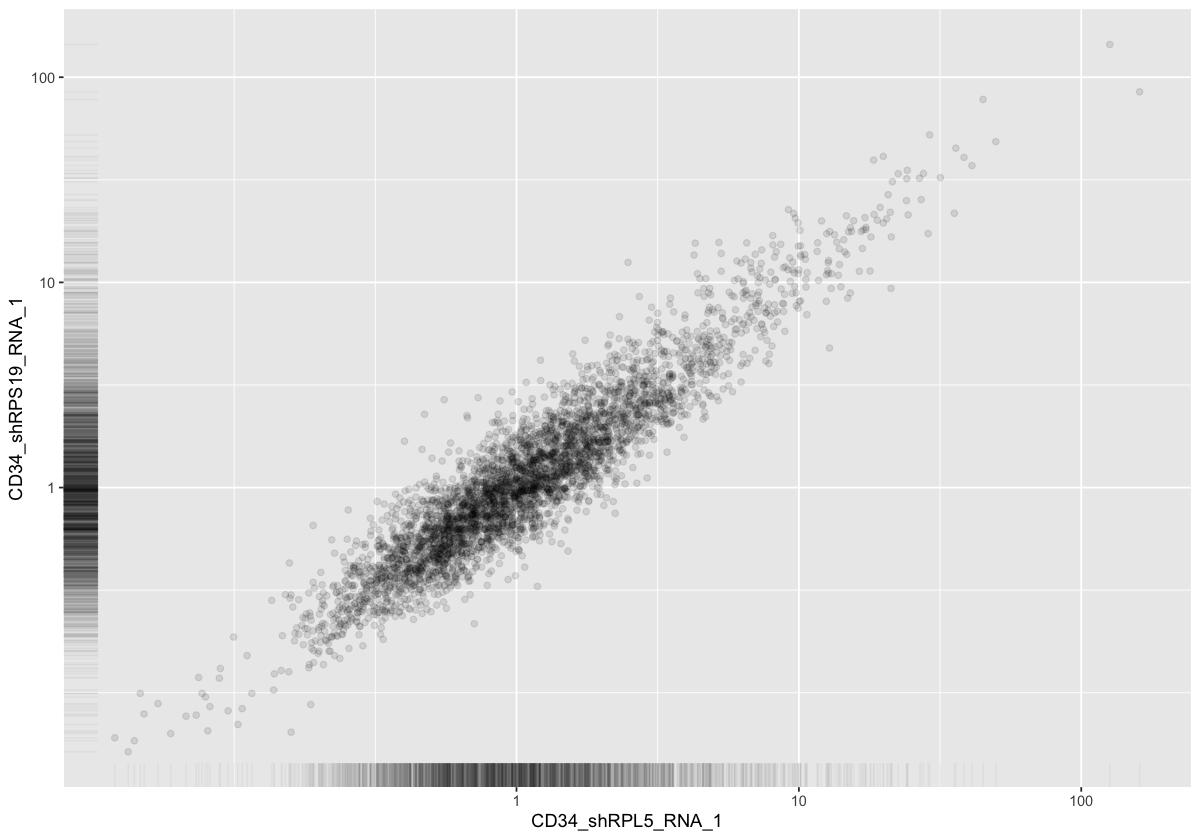

In [19]:
# original code
# data %>%
  # select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>%
  # ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1)) +
  # geom_point()


data %>%
  select(CD34_shRPL5_RNA_1, CD34_shRPS19_RNA_1) %>%
  ggplot(aes(x = CD34_shRPL5_RNA_1, y = CD34_shRPS19_RNA_1)) +
  # used below functions to get log scale axes, specifying where I wanted the tick labels
  scale_x_log10(breaks = c(10^0, 10^1, 10^2, 10^3, 10^4, 10^5)) +
  scale_y_log10(breaks = c(10^0, 10^1, 10^2, 10^3, 10^4, 10^5)) +
  # reduce alpha to 0.1 for geom_point to better show high density areas
  geom_point(alpha=0.1) +
  # added geom_rug to show distribution of data points on each axis
  geom_rug(alpha=0.03)

**In problems 4 through 6, assign the result of your operation back to the `data`
variable.**

## Problem 4

**10 points**

Write a code cell to select the following columns from the `data` variable you created above and reassign back to `data`.

Columns to select: `ensembl_gene_id`, columns that have either `RPL5`, `RPS19`, or `Luc` in their name.

Instead of listing every column, use [`matches`](https://tidyselect.r-lib.org/reference/starts_with.html) and a succinct [regular expression](https://stringr.tidyverse.org/articles/regular-expressions.html) to select the above columns.

In [5]:
data <- data %>% select(ensembl_gene_id, matches(c("RPL5", "RPS19", "Luc")))

head(data)

ensembl_gene_id,CD34_shRPL5_RNA_1,CD34_shRPL5_RNA_2,CD34_shRPL5_RPF_1,CD34_shRPL5_RPF_2,CD34_shRPS19_RNA_1,CD34_shRPS19_RNA_2,CD34_shRPS19_RPF_1,CD34_shRPS19_RPF_2,CD34_shLuc_RNA_1,CD34_shLuc_RNA_2,CD34_shLuc_RPF_1,CD34_shLuc_RPF_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003,40,49,6,3,20,25,0,2,84,86,22,12
ENSG00000000005,0,0,0,0,1,0,0,0,3,0,0,0
ENSG00000000419,1116,1000,101,249,691,675,212,133,1030,1206,220,144
ENSG00000000457,149,126,14,22,185,225,40,20,153,128,14,17
ENSG00000000460,289,268,52,106,152,237,77,40,364,425,143,57
ENSG00000000938,204,145,17,13,412,403,31,30,8,8,0,0


## Problem 5

**10 points**

Write a code cell to filter the result from Problem 4 to include only rows where each of the 12 numerical columns you selected has 50 counts or more  and reassign back to `data`.
This is a simple way to avoid genes that have very low counts.

You might be tempted to do this step separately for each of the 12 columns, but instead use the `across` function you learned above or the `pivot_longer` function from the class (either way is fine).

In [6]:
data <- data %>% filter(across(!ensembl_gene_id, ~. > 50))

head(data)


ensembl_gene_id,CD34_shRPL5_RNA_1,CD34_shRPL5_RNA_2,CD34_shRPL5_RPF_1,CD34_shRPL5_RPF_2,CD34_shRPS19_RNA_1,CD34_shRPS19_RNA_2,CD34_shRPS19_RPF_1,CD34_shRPS19_RPF_2,CD34_shLuc_RNA_1,CD34_shLuc_RNA_2,CD34_shLuc_RPF_1,CD34_shLuc_RPF_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,1116,1000,101,249,691,675,212,133,1030,1206,220,144
ENSG00000001036,1487,936,182,295,800,752,148,136,913,854,189,183
ENSG00000001084,1036,1224,134,275,558,817,169,95,1479,1656,220,174
ENSG00000001497,1436,1231,253,367,885,1016,195,137,1647,2118,594,392
ENSG00000002549,1228,1186,285,447,693,897,260,229,1537,1668,459,272
ENSG00000002586,2746,1600,260,395,2570,1989,379,258,819,811,166,112


## Problem 6

**10 points**

Write a code cell to divide each of the 12 numerical columns by the
corresponding median value for each column
and reassign back to `data`. This median normalization is typically done in
high-throughput experiments after filtering
to normalize for sample-to-sample difference in read depth.

Again, you can write lot less code if you use the `mutate` and `across` function
you learned above.


In [7]:
data <- data %>% mutate(across(!ensembl_gene_id, function(x){x/median(x)}))

head(data)

ensembl_gene_id,CD34_shRPL5_RNA_1,CD34_shRPL5_RNA_2,CD34_shRPL5_RPF_1,CD34_shRPL5_RPF_2,CD34_shRPS19_RNA_1,CD34_shRPS19_RNA_2,CD34_shRPS19_RPF_1,CD34_shRPS19_RPF_2,CD34_shLuc_RNA_1,CD34_shLuc_RNA_2,CD34_shLuc_RPF_1,CD34_shLuc_RPF_2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000419,0.8110465,0.8271299,0.6121212,0.8861210,0.6721790,0.5947137,1.0392157,0.8364780,0.7652303,0.8154158,0.8593750,0.8520710
ENSG00000001036,1.0806686,0.7741935,1.1030303,1.0498221,0.7782101,0.6625551,0.7254902,0.8553459,0.6783061,0.5774172,0.7382812,1.0828402
ENSG00000001084,0.7529070,1.0124069,0.8121212,0.9786477,0.5428016,0.7198238,0.8284314,0.5974843,1.0988113,1.1196755,0.8593750,1.0295858
ENSG00000001497,1.0436047,1.0181969,1.5333333,1.3060498,0.8608949,0.8951542,0.9558824,0.8616352,1.2236256,1.4320487,2.3203125,2.3195266
ENSG00000002549,0.8924419,0.9809760,1.7272727,1.5907473,0.6741245,0.7903084,1.2745098,1.4402516,1.1419019,1.1277890,1.7929688,1.6094675
ENSG00000002586,1.9956395,1.3234078,1.5757576,1.4056940,2.5000000,1.7524229,1.8578431,1.6226415,0.6084695,0.5483435,0.6484375,0.6627219


## Problem 7

**10 points**

After we do the above filtering and median-normalization, let us calculate
translation efficiency as the average ratio of the RPF and RNA reads for each
treatment condition. Then we calculate how this translation efficiency changes
between target (`rpl5` and `rps19`) and control (`luc`) shRNAs.

The code implementing the above steps is shown below, but it has a few
errors. Correct them.


In [8]:
# original code
# lfc <- data %>%
#   mutate(mean_rpl5_te = ((CD34_shRPL5_RPF_1 + CD34_shRPL5_RPF_2) /
                            # (CD34_shRPL5_RNA_1 + CD34_shRPL5_RNA_2)) %>%
#   mutate(mean_rps19_te = ((CD34_shRPS19_RPF_1 + CD34_shRPS19_RPF_2) /
                            # (CD34_shRPS19_RNA_1 + CD34_shRPS19_RNA_2)) %>%
#   mutate(mean_shluc_te = ((CD34_shLuc_RPF_1 + CD34_shLuc_RPF_2) /
                            # (CD34_shLuc_RNA_1 + CD34_shLuc_RNA2)) %>%
#   select(ensembl_gene_id, mean_rpl5_te, mean_rps19_te) %>%
#   mutate(lfc_te_rpl5 == log2(mean_rpl5_te / mean_shluc_te),
       #   lfc_te_rps19 == log2(mean_rps19_te / mean_shluc_te)) %>%
#   print()


  lfc <- data %>%
  mutate(mean_rpl5_te = ((CD34_shRPL5_RPF_1 + CD34_shRPL5_RPF_2) /
                            (CD34_shRPL5_RNA_1 + CD34_shRPL5_RNA_2))) %>%
  mutate(mean_rps19_te = ((CD34_shRPS19_RPF_1 + CD34_shRPS19_RPF_2) /
                            (CD34_shRPS19_RNA_1 + CD34_shRPS19_RNA_2))) %>%
  mutate(mean_shluc_te = ((CD34_shLuc_RPF_1 + CD34_shLuc_RPF_2) /
                            (CD34_shLuc_RNA_1 + CD34_shLuc_RNA_2))) %>%
  select(ensembl_gene_id, mean_rpl5_te, mean_rps19_te, mean_shluc_te) %>%
  mutate(lfc_te_rpl5 = log2(mean_rpl5_te / mean_shluc_te),
         lfc_te_rps19 = log2(mean_rps19_te / mean_shluc_te)) %>%
  print()


# A tibble: 4,185 x 6
   ensembl_gene_id mean_rpl5_te mean_rps19_te mean_shluc_te lfc_te_rpl5
   <chr>                  <dbl>         <dbl>         <dbl>       <dbl>
 1 ENSG00000000419        0.915         1.48          1.08       -0.244
 2 ENSG00000001036        1.16          1.10          1.45       -0.321
 3 ENSG00000001084        1.01          1.13          0.851       0.253
 4 ENSG00000001497        1.38          1.04          1.75       -0.343
 5 ENSG00000002549        1.77          1.85          1.50        0.241
 6 ENSG00000002586        0.898         0.818         1.13       -0.335
 7 ENSG00000002834        0.477         0.391         0.518      -0.120
 8 ENSG00000003056        1.86          1.85          1.02        0.877
 9 ENSG00000003393        0.827         1.19          0.461       0.842
10 ENSG00000003402        0.502         0.424         0.344       0.547
# ... with 4,175 more rows, and 1 more variable: lfc_te_rps19 <dbl>


## Problem 8

**10 points**

Write code that will create a new dataframe called `mean_lfc` from `lfc`
containing a new column called `avg_lfc`.
`avg_lfc` should be the average of the log2 fold-change in TE (`lfc_te`) upon
knockdown of RPL5 and RPS19.

Then select only the gene id column and the new column that you just created
(this will be your new dataframe `mean_lfc`).


In [9]:
mean_lfc <- lfc %>%
mutate(avg_lfc = (lfc_te_rpl5 + lfc_te_rps19)/2) %>%
select(ensembl_gene_id, avg_lfc)



## Problem 9

**10 points**

Write code to join the `mean_lfc` dataframe with the `annotations` dataframe created
at the top of the document and assign back to `mean_lfc`.


In [10]:
mean_lfc <- mean_lfc %>% left_join(annotations, by="ensembl_gene_id")

head(mean_lfc)

ensembl_gene_id,avg_lfc,symbol,name,gene_group,ccds_id
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
ENSG00000000419,0.1039537,DPM1,"dolichyl-phosphate mannosyltransferase subunit 1, catalytic",Glycosyltransferase family 2|Dolichyl-phosphate mannosyltransferase subunits,CCDS13434|CCDS82628
ENSG00000001036,-0.3619136,FUCA2,alpha-L-fucosidase 2,Alpha-L-fucosidases,CCDS5200
ENSG00000001084,0.3300414,GCLC,glutamate-cysteine ligase catalytic subunit,NA,CCDS75471|CCDS4952
ENSG00000001497,-0.5493425,LAS1L,LAS1 like ribosome biogenesis factor,Large ribosomal subunit biogenesis complex,CCDS55433|CCDS14381|CCDS55434
ENSG00000002549,0.2734944,LAP3,leucine aminopeptidase 3,Aminopeptidases,CCDS3422
ENSG00000002586,-0.4025630,CD99,CD99 molecule (Xg blood group),Blood group antigens|CD molecules|Pseudoautosomal region 1,CCDS75947|CCDS48071|CCDS83452|CCDS14119


## Problem 10

**10 points**

1. Write code to select only the bottom 10 genes with the lowest `avg_lfc` and display the gene `symbol`, gene `name` and `avg_lfc` for these genes.
2. Create a figure using `ggplot2` to visualize these results.

Write a few sentences to justify the choices you made when creating your figure.

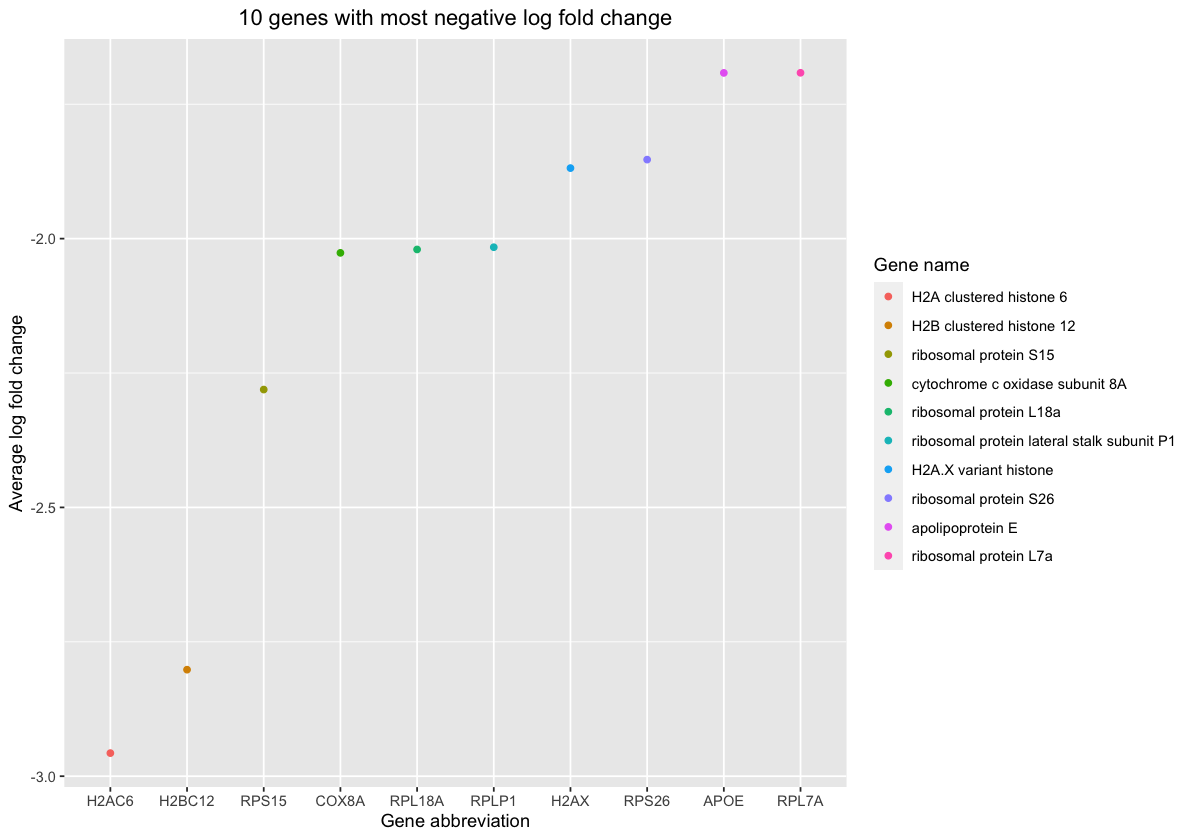

In [20]:
plot_data <- mean_lfc %>%
arrange(avg_lfc) %>%
head(10) %>%
select(symbol, name, avg_lfc)

options(repr.plot.width=10, repr.plot.height=7)

plot_data %>%
ggplot(aes(x = fct_reorder(symbol, avg_lfc), y = avg_lfc, 
             color = fct_reorder(name, avg_lfc))) +
  geom_point() + 
  labs(x="Gene abbreviation", y="Average log fold change", color= "Gene name", title= "10 genes with most negative log fold change") +
  theme(plot.title = element_text(hjust = 0.5)) 

Justification for plot choices:
I showed the log fold change values as points in ascending order, for ease of viewing and so viewers can easily see which genes are the most important. The gene abbreviations are used on the x axis because the full names are so long. the legend has the full names, which are displayed in the same order as abbreviations on the x axis, and are also linked to the data points by color. I changed the default plot width and height options to make it easier to see.